In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("attachment_titanic.csv")
df_train.shape

(891, 12)

In [3]:
df_test=pd.read_csv("attachment_titanic_test.csv")
df_test.shape

(418, 11)

In [4]:
df=pd.concat([df_train,df_test],axis=0)

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df=df.reset_index(drop=True)

In [7]:
df.shape

(1309, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0.0,37.037037,52.717391,75.763747
1.0,62.962963,47.282609,24.236253


<Axes: >

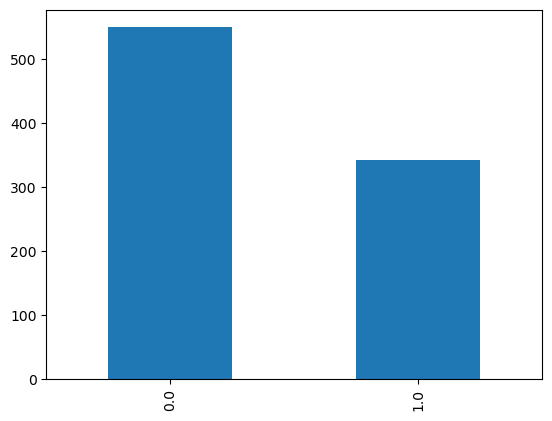

In [11]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: >

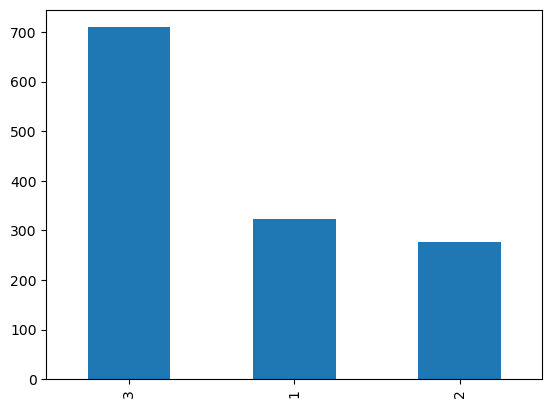

In [12]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

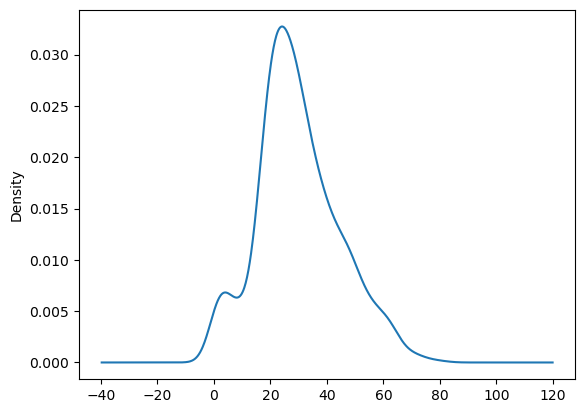

In [13]:
df['Age'].plot(kind='kde')

(<Axes: ylabel='Density'>, 4.367709134122922)

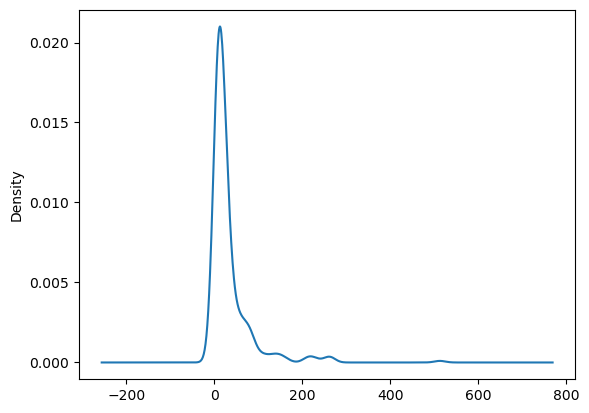

In [14]:
df['Fare'].plot(kind='kde'),df['Fare'].skew()

In [15]:
df=df.drop('PassengerId',axis=1)

In [16]:
df['Family']=df['SibSp']+df['Parch']
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [17]:
df=df.drop(['SibSp','Parch'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   Ticket    1309 non-null   object 
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
 9   Family    1309 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 102.4+ KB


In [18]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0.0,25.796178,81.109185
1.0,74.203822,18.890815


In [19]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0.0,37.037037,52.717391,75.763747
1.0,62.962963,47.282609,24.236253


C:\Users\admin\AppData\Local\Temp\ipykernel_9328\2838955624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],kde=True)


<Axes: xlabel='Fare', ylabel='Density'>

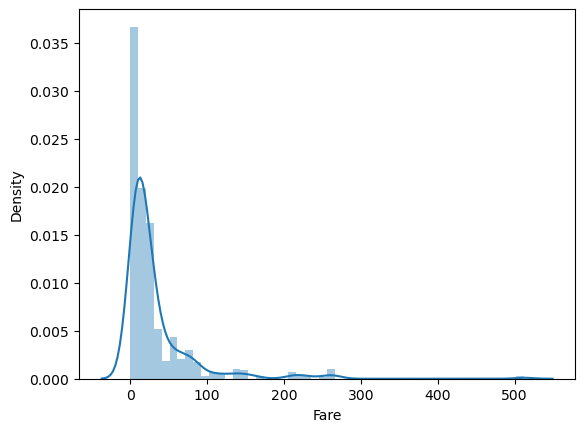

In [20]:
sns.distplot(df['Fare'],kde=True)

In [21]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0.0,44.642857,61.038961,66.304348
1.0,55.357143,38.961039,33.695652


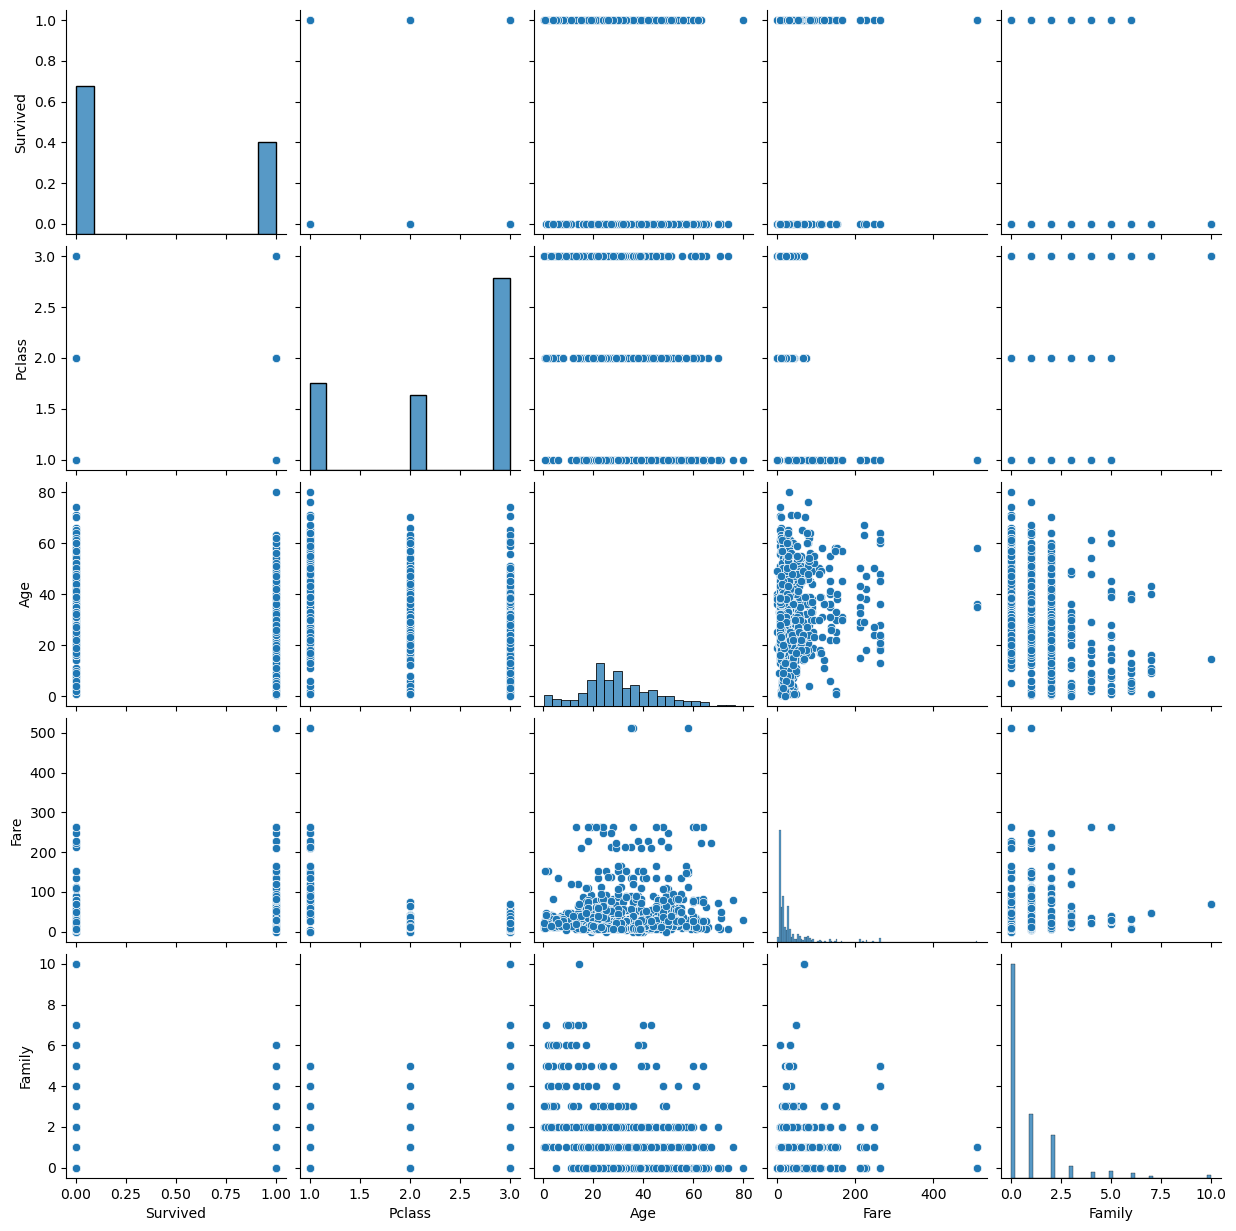

In [22]:
sns.pairplot(df)

<Axes: xlabel='Embarked', ylabel='Fare'>

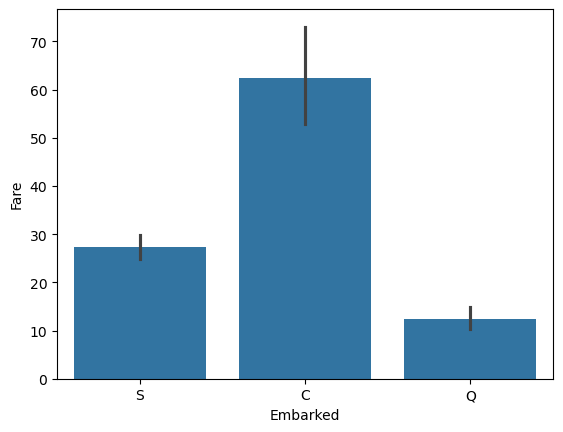

In [23]:
sns.barplot(x='Embarked',y='Fare',data=df)

In [24]:
pd.crosstab(df['Embarked'],df['Survived'],normalize='columns')*100

Survived,0.0,1.0
Embarked,,
C,13.661202,27.352941
Q,8.561020,8.823529
S,77.777778,63.823529


In [25]:
df[df['Fare']>500]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
258,1.0,1,"Ward, Miss. Anna",female,35.0,PC 17755,512.3292,NaN,C,0
679,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,PC 17755,512.3292,B51 B53 B55,C,1
737,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,512.3292,B101,C,0
1234,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,PC 17755,512.3292,B51 B53 B55,C,1


In [26]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Family         0
dtype: int64

In [27]:
 df[pd.isna(df['Fare'])]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
1043,NaN,3,"Storey, Mr. Thomas",male,60.5,3701,NaN,NaN,S,0


In [28]:
 df[pd.isna(df['Embarked'])]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
61,1.0,1,"Icard, Miss. Amelie",female,38.0,113572,80.0,B28,NaN,0
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,113572,80.0,B28,NaN,0


In [29]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,41.851852,48.780488,31.838074
male,58.148148,51.219512,68.161926


In [30]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0.0,44.642857,61.038961,66.304348
1.0,55.357143,38.961039,33.695652


In [31]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [32]:
df['Embarked'].fillna('C', inplace=True)

In [33]:
 df[pd.isna(df['Fare'])]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
1043,NaN,3,"Storey, Mr. Thomas",male,60.5,3701,NaN,NaN,S,0


In [34]:
df['Fare'].min(),df['Fare'].max()

(0.0, 512.3292)

In [35]:
df['Fare'].fillna(14.43, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_9328\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

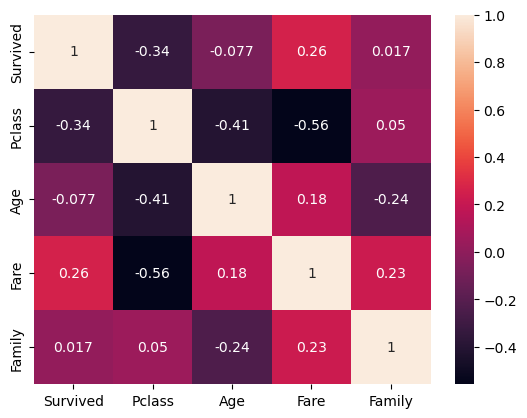

In [36]:
sns.heatmap(df.corr(),annot=True)

In [37]:
df['Individual_Fare']=(df['Fare']/(df['Family']+1))
df

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,3.625000
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,35.641650
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,7.925000
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,26.550000
4,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,8.050000
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,NaN,S,0,8.050000
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C105,C,0,108.900000
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0,7.250000
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,359309,8.0500,NaN,S,0,8.050000


<Axes: >

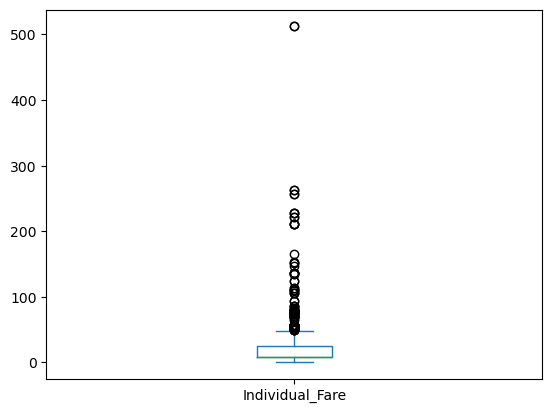

In [38]:
df['Individual_Fare'].plot(kind='box')

In [39]:
df[['Individual_Fare','Fare']].describe()

,Individual_Fare,Fare
count,1309.000000,1309.000000
mean,20.513564,33.281067
std,35.761055,51.741507
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.566667,14.454200
75%,24.150000,31.275000
max,512.329200,512.329200


In [40]:
df[df['Individual_Fare']>500]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare
258,1.0,1,"Ward, Miss. Anna",female,35.0,PC 17755,512.3292,NaN,C,0,512.3292
737,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,512.3292,B101,C,0,512.3292


In [41]:
df

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,3.625000
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,35.641650
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,7.925000
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,26.550000
4,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,8.050000
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,NaN,S,0,8.050000
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C105,C,0,108.900000
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0,7.250000
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,359309,8.0500,NaN,S,0,8.050000


In [42]:
df.isnull().sum()

Survived            418
Pclass                0
Name                  0
Sex                   0
Age                 263
Ticket                0
Fare                  0
Cabin              1014
Embarked              0
Family                0
Individual_Fare       0
dtype: int64

In [43]:
df['Cabin']=df['Cabin'].str[0]

In [44]:
pd.crosstab(df['Survived'],df['Cabin'],normalize='columns')*100

Cabin,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,0.0


In [45]:
df[df['Cabin']=='T']

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare
339,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,113784,35.5,T,S,0,35.5


<Axes: xlabel='Cabin'>

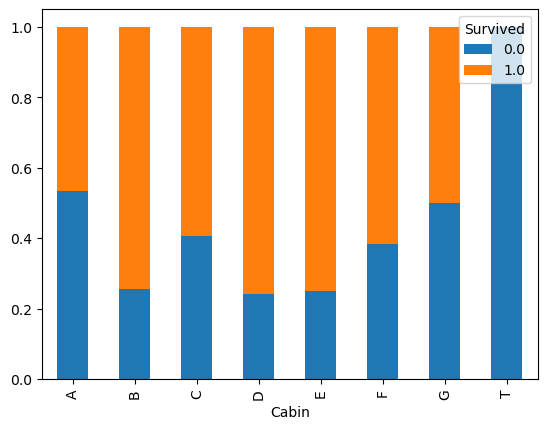

In [46]:
pd.crosstab(df['Cabin'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

<Axes: xlabel='Individual_Fare', ylabel='Age'>

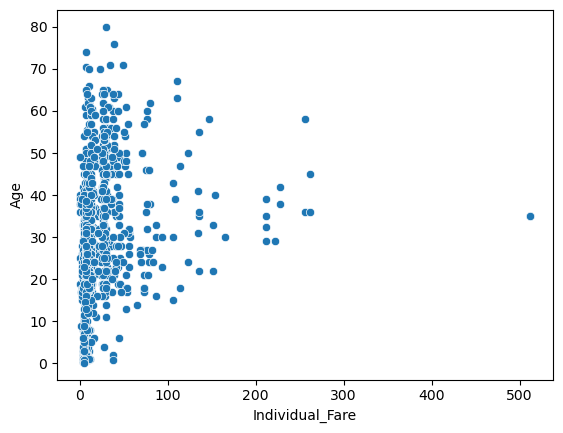

In [47]:
sns.scatterplot(x='Individual_Fare',y='Age',data=df)

In [48]:
df['Ticket'].str[0:2]

0       A/
1       PC
2       ST
3       11
4       37
        ..
1304    A.
1305    PC
1306    SO
1307    35
1308    26
Name: Ticket, Length: 1309, dtype: object

In [49]:
df[pd.isna(df['Age'])]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare
5,0.0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q,0,8.458300
17,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,244373,13.0000,NaN,S,0,13.000000
19,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,2649,7.2250,NaN,C,0,7.225000
26,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,2631,7.2250,NaN,C,0,7.225000
28,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,330959,7.8792,NaN,Q,0,7.879200
...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,334915,7.7208,NaN,Q,0,7.720800
1301,NaN,3,"Naughton, Miss. Hannah",female,NaN,365237,7.7500,NaN,Q,0,7.750000
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,NaN,S,0,8.050000
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,359309,8.0500,NaN,S,0,8.050000


In [50]:
df.drop('Ticket',axis=1,inplace=True)

In [51]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family,Individual_Fare
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,1,3.625000
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,C,1,35.641650
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,0,7.925000
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C,S,1,26.550000
4,0.0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,0,8.050000
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,8.0500,NaN,S,0,8.050000
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,C,C,0,108.900000
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,NaN,S,0,7.250000
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,8.0500,NaN,S,0,8.050000


In [52]:
df.describe()

,Survived,Pclass,Age,Fare,Family,Individual_Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,33.281067,0.883881,20.513564
std,0.486592,0.837836,14.413493,51.741507,1.583639,35.761055
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,7.895800,0.000000,7.452767
50%,0.000000,3.000000,28.000000,14.454200,0.000000,8.566667
75%,1.000000,3.000000,39.000000,31.275000,1.000000,24.150000
max,1.000000,3.000000,80.000000,512.329200,10.000000,512.329200


In [53]:
print(df[pd.isna(df['Age']) & (df['Embarked'] == 'S')].describe())

        Survived      Pclass  Age        Fare      Family  Individual_Fare
count  90.000000  132.000000  0.0  132.000000  132.000000       132.000000
mean    0.177778    2.530303  NaN   22.850376    1.090909        15.179322
std     0.384467    0.804941  NaN   28.194242    2.725213        22.820446
min     0.000000    1.000000  NaN    0.000000    0.000000         0.000000
25%     0.000000    2.000000  NaN    7.895800    0.000000         7.250000
50%     0.000000    3.000000  NaN    8.081250    0.000000         8.050000
75%     0.000000    3.000000  NaN   26.550000    0.000000        13.375000
max     1.000000    3.000000  NaN  221.779200   10.000000       221.779200


In [54]:
mean_age_S = df[(df['Embarked'] == 'S')]['Age'].mean()
mean_age_Q = df[(df['Embarked'] == 'Q')]['Age'].mean()
mean_age_C = df[(df['Embarked'] == 'C')]['Age'].mean()

In [55]:
df.loc[pd.isna(df['Age']) & (df['Embarked'] == 'S'), 'Age'] = mean_age_S
df.loc[pd.isna(df['Age']) & (df['Embarked'] == 'C'), 'Age'] = mean_age_C
df.loc[pd.isna(df['Age']) & (df['Embarked'] == 'Q'), 'Age'] = mean_age_Q

In [56]:
df.isnull().sum()

Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
Fare                  0
Cabin              1014
Embarked              0
Family                0
Individual_Fare       0
dtype: int64

In [57]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)
df['title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: title, dtype: int64

In [58]:
temp_df = df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.'])]

In [59]:
temp_df['title'].value_counts()

Mr.        757
Miss.      260
Mrs.       197
Master.     61
Name: title, dtype: int64

In [60]:
pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0.0,42.5,30.21978,84.332689,20.8
1.0,57.5,69.78022,15.667311,79.2


In [61]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family,Individual_Fare,title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,NaN,S,1,3.625000,Mr.
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C,C,1,35.641650,Mrs.
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,NaN,S,0,7.925000,Miss.
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,C,S,1,26.550000,Mrs.
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,NaN,S,0,8.050000,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,29.245205,8.0500,NaN,S,0,8.050000,Mr.
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,108.9000,C,C,0,108.900000,Dona.
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,7.2500,NaN,S,0,7.250000,Mr.
1307,NaN,3,"Ware, Mr. Frederick",male,29.245205,8.0500,NaN,S,0,8.050000,Mr.


In [62]:
titles_to_merge = ['Rev.', 'Dr.', 'Col.', 'Mlle.', 'Major.', 'Ms.', 'Lady.', 'Sir.', 'Mme.', 'Don.', 'Capt.', 'the', 'Jonkheer.', 'Dona.']
df['title'] = df['title'].replace(titles_to_merge, 'other')

In [63]:
df['title'].value_counts()

Mr.        757
Miss.      260
Mrs.       197
Master.     61
other       34
Name: title, dtype: int64

In [64]:
pd.crosstab(df['Survived'],df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,55.555556
1.0,57.5,69.78022,15.667311,79.2,44.444444


In [65]:
df.drop(['Fare','Cabin','Name'],axis=1,inplace=True)

In [66]:
df=pd.get_dummies(df,drop_first=True)
df

,Survived,Pclass,Age,Family,Individual_Fare,Sex_male,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_other
0,0.0,3,22.000000,1,3.625000,1,0,1,0,1,0,0
1,1.0,1,38.000000,1,35.641650,0,0,0,0,0,1,0
2,1.0,3,26.000000,0,7.925000,0,0,1,1,0,0,0
3,1.0,1,35.000000,1,26.550000,0,0,1,0,0,1,0
4,0.0,3,35.000000,0,8.050000,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,29.245205,0,8.050000,1,0,1,0,1,0,0
1305,NaN,1,39.000000,0,108.900000,0,0,0,0,0,0,1
1306,NaN,3,38.500000,0,7.250000,1,0,1,0,1,0,0
1307,NaN,3,29.245205,0,8.050000,1,0,1,0,1,0,0


In [67]:
df.isnull().sum()

Survived           418
Pclass               0
Age                  0
Family               0
Individual_Fare      0
Sex_male             0
Embarked_Q           0
Embarked_S           0
title_Miss.          0
title_Mr.            0
title_Mrs.           0
title_other          0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    float64
 1   Pclass           1309 non-null   int64  
 2   Age              1309 non-null   float64
 3   Family           1309 non-null   int64  
 4   Individual_Fare  1309 non-null   float64
 5   Sex_male         1309 non-null   uint8  
 6   Embarked_Q       1309 non-null   uint8  
 7   Embarked_S       1309 non-null   uint8  
 8   title_Miss.      1309 non-null   uint8  
 9   title_Mr.        1309 non-null   uint8  
 10  title_Mrs.       1309 non-null   uint8  
 11  title_other      1309 non-null   uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 60.2 KB


In [69]:
train=df.dropna(subset=['Survived'])

In [70]:
df

,Survived,Pclass,Age,Family,Individual_Fare,Sex_male,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_other
0,0.0,3,22.000000,1,3.625000,1,0,1,0,1,0,0
1,1.0,1,38.000000,1,35.641650,0,0,0,0,0,1,0
2,1.0,3,26.000000,0,7.925000,0,0,1,1,0,0,0
3,1.0,1,35.000000,1,26.550000,0,0,1,0,0,1,0
4,0.0,3,35.000000,0,8.050000,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,29.245205,0,8.050000,1,0,1,0,1,0,0
1305,NaN,1,39.000000,0,108.900000,0,0,0,0,0,0,1
1306,NaN,3,38.500000,0,7.250000,1,0,1,0,1,0,0
1307,NaN,3,29.245205,0,8.050000,1,0,1,0,1,0,0


In [71]:
train

,Survived,Pclass,Age,Family,Individual_Fare,Sex_male,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_other
0,0.0,3,22.000000,1,3.62500,1,0,1,0,1,0,0
1,1.0,1,38.000000,1,35.64165,0,0,0,0,0,1,0
2,1.0,3,26.000000,0,7.92500,0,0,1,1,0,0,0
3,1.0,1,35.000000,1,26.55000,0,0,1,0,0,1,0
4,0.0,3,35.000000,0,8.05000,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.000000,0,13.00000,1,0,1,0,0,0,1
887,1.0,1,19.000000,0,30.00000,0,0,1,1,0,0,0
888,0.0,3,29.245205,3,5.86250,0,0,1,1,0,0,0
889,1.0,1,26.000000,0,30.00000,1,0,0,0,1,0,0


In [72]:
test=df[pd.isna(df['Survived'])]

In [73]:
test.drop('Survived',axis=1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_9328\296848223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Survived',axis=1,inplace=True)


In [74]:
test

,Pclass,Age,Family,Individual_Fare,Sex_male,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_other
891,3,34.500000,0,7.829200,1,1,0,0,1,0,0
892,3,47.000000,1,3.500000,0,0,1,0,0,1,0
893,2,62.000000,0,9.687500,1,1,0,0,1,0,0
894,3,27.000000,0,8.662500,1,0,1,0,1,0,0
895,3,22.000000,2,4.095833,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,29.245205,0,8.050000,1,0,1,0,1,0,0
1305,1,39.000000,0,108.900000,0,0,0,0,0,0,1
1306,3,38.500000,0,7.250000,1,0,1,0,1,0,0
1307,3,29.245205,0,8.050000,1,0,1,0,1,0,0


In [75]:
train

,Survived,Pclass,Age,Family,Individual_Fare,Sex_male,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_other
0,0.0,3,22.000000,1,3.62500,1,0,1,0,1,0,0
1,1.0,1,38.000000,1,35.64165,0,0,0,0,0,1,0
2,1.0,3,26.000000,0,7.92500,0,0,1,1,0,0,0
3,1.0,1,35.000000,1,26.55000,0,0,1,0,0,1,0
4,0.0,3,35.000000,0,8.05000,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.000000,0,13.00000,1,0,1,0,0,0,1
887,1.0,1,19.000000,0,30.00000,0,0,1,1,0,0,0
888,0.0,3,29.245205,3,5.86250,0,0,1,1,0,0,0
889,1.0,1,26.000000,0,30.00000,1,0,0,0,1,0,0


In [76]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [90]:
rf=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
classifier=DecisionTreeClassifier()
logistic_model = LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

In [92]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
logistic_model.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [95]:
y_pred_rf=rf.predict(X_test)
y_pred_log=logistic_model.predict(X_test)
y_pred=classifier.predict(X_test)
y_pred_knn=knn.predict(X_test)

In [96]:
print("Random Forest Classifier: ",accuracy_score(y_pred_rf,y_test))
print("Logistic Regression Classifier: ",accuracy_score(y_pred_log,y_test))
print("Decision Tree Classifier: ",accuracy_score(y_pred,y_test))
print("KNearestNeighbor : ",accuracy_score(y_pred_knn,y_test))

Random Forest Classifier:  0.8435754189944135
Logistic Regression Classifier:  0.7877094972067039
Decision Tree Classifier:  0.8156424581005587
KNearestNeighbor :  0.7821229050279329


In [97]:
print("Random Forest Classifier: ",f1_score(y_pred_rf,y_test))
print("Logistic Regression Classifier: ",f1_score(y_pred_log,y_test))
print("Decision Tree Classifier: ",f1_score(y_pred,y_test))
print("KNN: ",f1_score(y_pred_knn,y_test))

Random Forest Classifier:  0.8108108108108109
Logistic Regression Classifier:  0.7432432432432431
Decision Tree Classifier:  0.7659574468085106
KNN:  0.7272727272727273


In [98]:
print("Random Forest Classifier: ",precision_score(y_pred_rf,y_test))
print("Logistic Regression Classifier: ",precision_score(y_pred_log,y_test))
print("Decision Tree Classifier: ",precision_score(y_pred,y_test))
print("KNN ",precision_score(y_pred_knn,y_test))

Random Forest Classifier:  0.8108108108108109
Logistic Regression Classifier:  0.7432432432432432
Decision Tree Classifier:  0.7297297297297297
KNN  0.7027027027027027


In [99]:
print("Random Forest Classifier: ",recall_score(y_pred_rf,y_test))
print("Logistic Regression Classifier: ",recall_score(y_pred_log,y_test))
print("Decision Tree Classifier: ",recall_score(y_pred,y_test))
print("KNN: ",recall_score(y_pred_knn,y_test))

Random Forest Classifier:  0.8108108108108109
Logistic Regression Classifier:  0.7432432432432432
Decision Tree Classifier:  0.8059701492537313
KNN:  0.7536231884057971


In [100]:
from sklearn.model_selection import cross_val_score
for i in range(1,52,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score_knn=cross_val_score(knn,X_test,y_test)
    print("K",i)
    print("CVS",str(score_knn))
    print("CVL_mean",str(score_knn.mean()))
    print(" ")
    

K 1
CVS [0.66666667 0.75       0.72222222 0.77777778 0.77142857]
CVL_mean 0.7376190476190476
 
K 3
CVS [0.52777778 0.77777778 0.72222222 0.83333333 0.85714286]
CVL_mean 0.7436507936507937
 
K 5
CVS [0.61111111 0.77777778 0.77777778 0.77777778 0.85714286]
CVL_mean 0.7603174603174603
 
K 7
CVS [0.55555556 0.80555556 0.72222222 0.72222222 0.91428571]
CVL_mean 0.743968253968254
 
K 9
CVS [0.58333333 0.80555556 0.75       0.75       0.85714286]
CVL_mean 0.7492063492063492
 
K 11
CVS [0.55555556 0.75       0.75       0.77777778 0.82857143]
CVL_mean 0.7323809523809524
 
K 13
CVS [0.58333333 0.80555556 0.75       0.75       0.88571429]
CVL_mean 0.7549206349206349
 
K 15
CVS [0.58333333 0.77777778 0.75       0.77777778 0.82857143]
CVL_mean 0.7434920634920635
 
K 17
CVS [0.52777778 0.80555556 0.75       0.77777778 0.8       ]
CVL_mean 0.7322222222222223
 
K 19
CVS [0.52777778 0.80555556 0.75       0.72222222 0.8       ]
CVL_mean 0.7211111111111113
 
K 21
CVS [0.58333333 0.77777778 0.75       0.7

In [102]:
sc=[]
for i in range(1,52,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    sc.append(accuracy_score(y_test,y_pred))

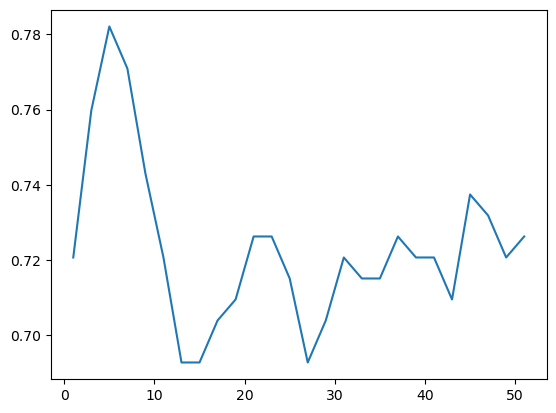

In [104]:
plt.plot(range(1,52,2),sc)

In [105]:
sc

[0.7206703910614525,
 0.7597765363128491,
 0.7821229050279329,
 0.770949720670391,
 0.7430167597765364,
 0.7206703910614525,
 0.6927374301675978,
 0.6927374301675978,
 0.7039106145251397,
 0.7094972067039106,
 0.7262569832402235,
 0.7262569832402235,
 0.7150837988826816,
 0.6927374301675978,
 0.7039106145251397,
 0.7206703910614525,
 0.7150837988826816,
 0.7150837988826816,
 0.7262569832402235,
 0.7206703910614525,
 0.7206703910614525,
 0.7094972067039106,
 0.7374301675977654,
 0.7318435754189944,
 0.7206703910614525,
 0.7262569832402235]

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [87]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [4, 5, 10],
    'min_samples_leaf': [5, 2, 4],
    'max_features': ['log2', 'sqrt',"None"]
}
grid_search_tree=GridSearchCV(classifier,param_grid,cv=5)

In [88]:
grid_search_tree.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\admin\anaconda3\lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['log2', 'sqrt', 'None'],
                         'min_samples_leaf': [5, 2, 4],
                         'min_samples_split': [4, 5, 10],
                         'splitter': ['best', 'random']})

In [89]:
grid_search_tree.best_score_

0.8314685314685315

In [90]:
grid_search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

In [91]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [4, 5, 10],
    'min_samples_leaf': [5, 2, 4],
    'max_features': ['log2', 'sqrt',"None"]
}
random_search_tree=RandomizedSearchCV(classifier,param_grid,cv=5)

In [92]:
random_search_tree.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\admin\anaconda3\lib\site-packages\

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': ['log2', 'sqrt',
                                                         'None'],
                                        'min_samples_leaf': [5, 2, 4],
                                        'min_samples_split': [4, 5, 10],
                                        'splitter': ['best', 'random']})

In [93]:
random_search_tree.best_score_,random_search_tree.best_params_

(0.8187826258248793,
 {'splitter': 'best',
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_features': 'log2',
  'max_depth': 15,
  'criterion': 'entropy'})

In [94]:
param_grid = {
    'n_estimators':[50,80,100,500],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth':[None,2,5],
    'max_features':['sqrt','log2','None'],
    'bootstrap':[True,False],
    'max_samples':[250,500,100,2000]
    
}
grid_search_rf=GridSearchCV(rf,param_grid,cv=5)

In [95]:
grid_search_rf.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 408, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Use

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 5],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'max_samples': [250, 500, 100, 2000],
                         'n_estimators': [50, 80, 100, 500]})

In [96]:
grid_search_rf.best_score_,grid_search_rf.best_params_

(0.8370136905348172,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'max_samples': 250,
  'n_estimators': 100})

In [97]:
random_search_rf=RandomizedSearchCV(rf,param_grid,cv=5)

In [98]:
random_search_rf.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootst

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 2, 5],
                                        'max_features': ['sqrt', 'log2',
                                                         'None'],
                                        'max_samples': [250, 500, 100, 2000],
                                        'n_estimators': [50, 80, 100, 500]})

In [99]:
random_search_rf.best_score_,random_search_rf.best_params_

(0.8314094356347876,
 {'n_estimators': 100,
  'max_samples': 100,
  'max_features': 'log2',
  'max_depth': 5,
  'criterion': 'log_loss',
  'bootstrap': True})

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [101]:
clf = BaggingClassifier(estimator=rf,n_estimators=20, random_state=42,bootstrap=True,max_samples=500).fit(X_train, y_train)

In [102]:
y_pred_clf=clf.predict(X_test)

In [103]:
accuracy_score(y_pred_clf,y_test)

0.8268156424581006

In [104]:
Xf=test.iloc[:,:].values

In [105]:
y_final=classifier.predict(Xf)

In [106]:
PassengerID=df_test['PassengerId']

In [107]:
PassengerID.shape

(418,)

In [108]:
y_final.shape

(418,)

In [109]:
final=pd.DataFrame()

In [110]:
final['PassengerID']=PassengerID
final['survived']=y_final

In [111]:
final

,PassengerID,survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [112]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [113]:
pd.crosstab(final['survived'],df_test['Sex'],normalize='columns')

Sex,female,male
survived,,
0.0,0.256579,0.800752
1.0,0.743421,0.199248


In [114]:
pd.crosstab(final['survived'],df_test['Embarked'],normalize='columns')

Embarked,C,Q,S
survived,,,
0.0,0.5,0.521739,0.655556
1.0,0.5,0.478261,0.344444


In [115]:
pd.crosstab(final['survived'],df_test['Pclass'],normalize='columns')

Pclass,1,2,3
survived,,,
0.0,0.411215,0.548387,0.720183
1.0,0.588785,0.451613,0.279817


In [88]:
from sklearn.metrics import classification_report

In [89]:
report = classification_report(y_test, y_pred)

In [92]:
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       105
         1.0       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

